# Fischereiquoten

![](https://upload.wikimedia.org/wikipedia/commons/0/00/Chilean_purse_seine.jpg)

Wie bestimmt man eine Fangquote und was sind deren Auswirkungen auf eine einfach Raeuber/Beute Dynamik?
Was passiert, wenn die Quote zu niedrig war?

### Variablen

$x_0$: Fische

$x_1$: Haie

$q$: Quote

Folgende Kurve drueckt den Sachverhalt aus, dass mit groesserer Fischabundanz auch der Fangerfolg (die Fangrate) steigt, bis zu einem gewissen Maximum welches durch die Quote (Tonnen pro Jahr) gegeben ist.

([<matplotlib.axis.YTick at 0x7f47bd3aed68>,
 <a list of 2 Text yticklabel objects>)

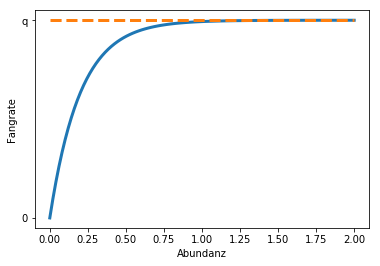

In [13]:
%matplotlib inline
from numpy import exp, linspace
from matplotlib import pyplot
xlist= linspace(0,2,100)
q = 1

pyplot.plot(xlist,q*(1-exp(-5*xlist)),lw=3)
pyplot.plot([xlist[0],xlist[-1]],[q,q],'--',lw=3)
pyplot.ylabel("Fangrate")
pyplot.xlabel("Abundanz")
pyplot.yticks([0,1],[0,"q"])

Die Dynamik einer Beutepopulatoin $x_0$ (Fische) und einer 
Raeuberpopulation $x_1$ (Haie) wird durch folgenden Differentialgleichung beschrieben

$$\frac{dx_0}{dt} = (3(1-x_0) - x_1)x_0 -q(1-\exp(-5x_0))$$
$$\frac{dx_1}{dt} = (3x_0 - 1)x_1$$

Was sind die Wachstumsraten fuer Fische und Haie?

$$r_0 = $$
$$r_1 = $$

In [34]:
from sympy import *
rechteseite = S('[(3*(1-x0) - x1)*x0 - q*(1-exp(-5*x0)), (3*x0-1) * x1]')
rhsode = lambdify(('x0','x1','q'),rechteseite)
pprint(rechteseite)

⎡    ⎛     -5⋅x₀⎞                                     ⎤
⎣- q⋅⎝1 - ℯ     ⎠ + x₀⋅(-3⋅x₀ - x₁ + 3), x₁⋅(3⋅x₀ - 1)⎦


Simuliere das Modell fuer verschiedene Anfangsbedingungen und Quoten.

Die erste Darstellungform ist der Graph der _Zeitreihe_. Hierbei wird eine Systemvariable (Fischabundanz) gegen die Zeit auftragen.

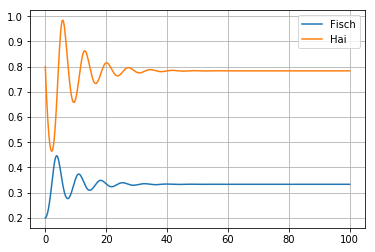

In [75]:
from scipy.integrate import odeint
from scipy import linspace
t = linspace(0,100,500)

# init= [0.2, .3]; q = 0.75 # LC
# init= [0.2, .3]; q = 0.7 # LC
# init= [0.1, .6]; q = 0.65 # bistab (unstab)
# init= [0.2, .3]; q = 0.65 # bistab (stab)
init= [0.2, 0.8]; q = 0.5 # stab

x=odeint(lambda x,t: rhsode(*x,q),init,t)
pyplot.plot(t,x)
pyplot.grid()
pyplot.legend(('Fisch','Hai'))

Eine weitere Darstellungsfrom ist das Phasendiagram. Hierbei weden zwei Systemvariablen gegeneinander aufgetragen. Es entstehen _Trajektorien_. Die Zeit ist nun implizit im Graph versteckt.

Text(0,0.5,'Haie [$x_1$]')

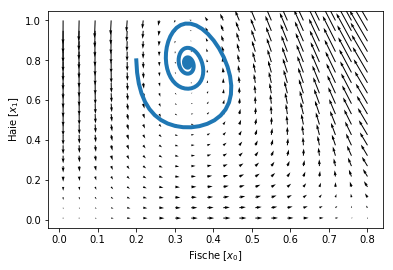

In [78]:
x0_list = linspace(0.01,.8,20)
x1_list = linspace(0.01,1,20)
pyplot.quiver(*zip(*[(j,k) for j in x0_list for k in x1_list]),
              *zip(*[rhsode(j,k,q) for j in x0_list for k in x1_list]))
pyplot.plot(x[:,0],x[:,1],lw=4)
pyplot.xlabel('Fische [$x_0$]')
pyplot.ylabel('Haie [$x_1$]')

Nullclinen zeigen an wo die Zeitableitung einer Systemvariable Null ist. Man bekommt sie, in dem man die Differentialgleichung einer Dimension Null setzt und nach einer der Systemvariablen aufloest. Dort woe sich Nullclinen schneiden entstehen Fixpunkte.

In [79]:
x0nullcline = lambdify(("x0","q"),solve(rechteseite[0],'x1')[0])
x1nullcline = lambdify(("x1","q"),solve(rechteseite[1],'x0')[0])

Text(0,0.5,'Haie [$x_1$]')

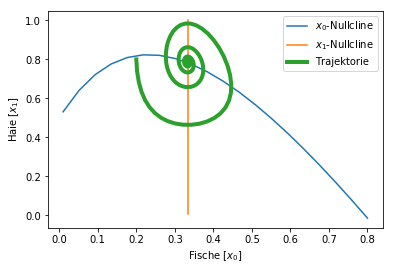

In [83]:
pyplot.plot(x0_list,[x0nullcline(k,q) for k in x0_list])
pyplot.plot([x1nullcline(k,q) for k in x1_list], x1_list)
pyplot.plot(x[:,0],x[:,1],lw=4)
pyplot.legend(('$x_0$-Nullcline','$x_1$-Nullcline','Trajektorie'))
pyplot.xlabel('Fische [$x_0$]')
pyplot.ylabel('Haie [$x_1$]')

## Bifurkationsdiagramm

Bifurkationsdiagram zeigen die Loesungen einer Diffrentialgleichung als Funktion der Systemparameter (hier die Quote).

![](https://itb.biologie.hu-berlin.de/~schleimer/doc/quota_vs_fish.png)

# Hysteresis

In einem Parameterbereich existieren ZWEI Fixpunkte fuer die Fischpopulation, die beide stabil sind (ein Dritter inst unstabil). Ein solches System heist __bistabil__.

Im bistabilen Bereich haengt die Effizienz einer Quote davon ab was die "Anfangsabundanzen" sind. Eine Quote ist dann kein allgemeiner Garant fuer stabile Fischpopulationen.